In [98]:

import numpy as np
import pandas as pd
energy=pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38)
del(energy['Unnamed: 0'])
del(energy['Unnamed: 1'])
col_names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy.columns=col_names
energy[energy['Energy Supply']=='...']=np.NaN
energy['Energy Supply']=energy['Energy Supply']*10**6
energy['Country']=energy['Country'].str.replace(r'\(.*\)','')
energy['Country']=energy['Country'].str.replace(r'([0-9]+)$','')
replace_dict={
    "Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"
}

energy['Country'].replace(to_replace=replace_dict,inplace=True)
energy=energy.set_index('Country')

GDP=pd.read_csv('world_bank.csv',skiprows=4)
replace_dict={
    "Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"
}

GDP.rename(columns={'Country Name':'Country'},inplace=True)
GDP.replace(to_replace=replace_dict,inplace=True)
years_to_keep=np.arange(2006,2016).astype('str')
GDP=GDP[np.append(['Country'],years_to_keep)]
GDP=GDP.set_index('Country')
ScimEn=pd.read_excel('scimagojr-3.xlsx',header=0)
ScimEn=ScimEn.set_index('Country')
first_merge=pd.merge(energy,GDP,how='outer',left_index=True,right_index=True)
result=pd.merge(ScimEn,first_merge,how='outer',left_index=True,right_index=True)
result=result[result['Rank']<=15]
#result.shape[0]-15

In [62]:
years_to_keep=np.arange(2006,2016).astype('str')
avg_GDP=result[years_to_keep].mean(axis=1)
avg_GDP.sort_values(ascending=False)

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [93]:
years_to_keep=np.arange(2006,2016).astype('str')
result['avgGDP']=result[years_to_keep].mean(axis=1)
result=result.sort_values(['avgGDP'],ascending=False)
result['deltaGDP']=result['2015']-result['2006']
result=result.reset_index()
result.loc[5,'deltaGDP']

246702696075.3999

In [103]:
result['Energy Supply per Capita'].dropna().mean(axis=0)

160.35714285714286

In [109]:
result=result.sort_values(['% Renewable'],ascending=False)
result=result.reset_index()
result.loc[0,'% Renewable']
result.loc[0,'Country']


'Brazil'

In [107]:
result['% Renewable'].max()

69.64803

In [120]:

    result['citationratio']=result['Self-citations']/result['Citations']
    result=result.sort_values(['citationratio'],ascending=False)
    result1=result.reset_index()
    country=result1.loc[0,'Country']
    country
    result1.loc[0,'citationratio']


0.6893126179389422

In [149]:
result['popest']=result['Energy Supply']/result['Energy Supply per Capita']
result=result.sort_values(['popest'],ascending=False)
result=result.reset_index()
result.loc[2,'Country']

'United States'

In [178]:
    import pandas as pd
    import numpy as np
    energy = pd.read_excel('Energy Indicators.xls', skip_footer=38, skiprows=17)
    del(energy['Unnamed: 0'])
    del(energy['Unnamed: 1'])
    col_names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    
    energy.columns = col_names
    energy.loc[energy['Energy Supply'] == '...'] = np.NaN
    energy[['Energy Supply', 'Energy Supply per Capita']] = energy[['Energy Supply', 'Energy Supply per Capita']].apply(pd.to_numeric)
    energy['Energy Supply'] = energy['Energy Supply']*10**6
    energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")
    energy['Country'] = energy['Country'].str.replace(r"([0-9]+)$","")
    replace_dict={"Republic of Korea": "South Korea",
                  "United States of America": "United States",
                  "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                  "China, Hong Kong Special Administrative Region": "Hong Kong"}
    energy['Country'].replace(to_replace=replace_dict, inplace=True)
    energy.reset_index()
    energy = energy.set_index('Country')
    
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    replace_dict = {"Korea, Rep.": "South Korea", 
                    "Iran, Islamic Rep.": "Iran",
                    "Hong Kong SAR, China": "Hong Kong"
                   }
    GDP['Country Name'].replace(to_replace=replace_dict, inplace=True)
    years_to_keep = np.arange(2006, 2016).astype(str)
    GDP = GDP[np.append(['Country Name'],years_to_keep)]
    GDP.reset_index()
    GDP = GDP.rename(columns={'Country Name': 'Country'})
    GDP = GDP.set_index('Country')
    
    ScimEn = pd.read_excel('scimagojr-3.xlsx', header=0)
    ScimEn.reset_index()
    ScimEn = ScimEn.set_index('Country')
    first_merge = pd.merge(energy, GDP, how='outer', left_index=True, right_index=True)
    result = pd.merge(ScimEn, first_merge, how='outer', left_index=True, right_index=True)
    result = result.reset_index().dropna(thresh=result.shape[1]-10).set_index('Country')
    result = result.loc[result['Rank']<=15]
    result['popest']=result['Energy Supply']/result['Energy Supply per Capita']
    result['citable documents per person']=result['Citable documents']/result['popest']
    result=result.corr()
    result.loc['citable documents per person','Energy Supply per Capita']

0.7940010435442943

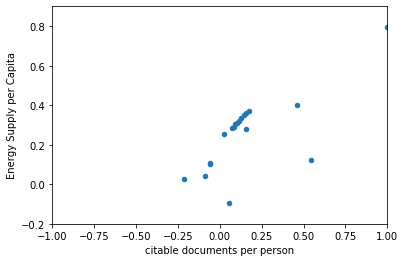

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline
result.plot(x='citable documents per person',y='Energy Supply per Capita',kind='scatter',xlim=[-1,1],ylim=[-0.2,0.9])

In [182]:
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,popest,citable documents per person
Rank,1.000000,-0.703849,-0.702179,-0.689219,-0.640129,0.335432,-0.589597,-0.656759,-0.253657,0.295288,...,-0.596649,-0.605260,-0.615397,-0.624305,-0.632670,-0.640750,-0.646377,-0.630748,-0.381968,-0.169030
Documents,-0.703849,1.000000,0.999943,0.924086,0.991635,-0.360302,0.617514,0.973529,0.108474,-0.166832,...,0.714274,0.745377,0.763783,0.784191,0.799996,0.816652,0.830983,0.840711,0.602567,-0.056707
Citable documents,-0.702179,0.999943,1.000000,0.920451,0.992488,-0.362623,0.611284,0.974058,0.103424,-0.165754,...,0.707633,0.739044,0.757710,0.778357,0.794362,0.811247,0.825754,0.835549,0.606499,-0.060775
Citations,-0.689219,0.924086,0.920451,1.000000,0.897606,-0.111725,0.854724,0.860706,0.279274,-0.149209,...,0.883392,0.902614,0.911067,0.921480,0.929063,0.936861,0.944320,0.949564,0.425187,0.157238
Self-citations,-0.640129,0.991635,0.992488,0.897606,1.000000,-0.314783,0.580556,0.968527,0.043799,-0.133179,...,0.647486,0.682508,0.702651,0.725270,0.742572,0.761249,0.777643,0.790658,0.643756,-0.087514
Citations per document,0.335432,-0.360302,-0.362623,-0.111725,-0.314783,1.000000,0.306977,-0.467667,0.124916,0.244349,...,-0.128897,-0.141112,-0.156990,-0.170657,-0.182627,-0.193492,-0.199785,-0.254229,-0.348751,0.543795
H index,-0.589597,0.617514,0.611284,0.854724,0.580556,0.306977,1.000000,0.505392,0.399212,-0.063636,...,0.843794,0.845414,0.842112,0.839667,0.836923,0.834091,0.832627,0.826819,0.154473,0.461319
Energy Supply,-0.656759,0.973529,0.974058,0.860706,0.968527,-0.467667,0.505392,1.000000,0.025135,-0.165830,...,0.647656,0.682087,0.702541,0.725422,0.743307,0.761878,0.778224,0.789133,0.721652,-0.214744
Energy Supply per Capita,-0.253657,0.108474,0.103424,0.279274,0.043799,0.124916,0.399212,0.025135,1.000000,-0.093667,...,0.350808,0.334140,0.320286,0.310022,0.303070,0.292056,0.283620,0.253759,-0.472593,0.794001
% Renewable,0.295288,-0.166832,-0.165754,-0.149209,-0.133179,0.244349,-0.063636,-0.165830,-0.093667,1.000000,...,-0.172766,-0.172028,-0.171468,-0.170287,-0.171599,-0.171410,-0.173420,-0.242144,-0.098669,0.055431


In [2]:
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
Australia,14.0,8831.0,8725.0,90765.0,15606.0,10.28,107.0,5386000000,231,11.810810,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12
Brazil,15.0,8668.0,8596.0,60702.0,14396.0,7.00,86.0,12149000000,59,69.648030,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12
Canada,6.0,17899.0,17620.0,215003.0,40930.0,12.01,149.0,10431000000,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
China,1.0,127050.0,126767.0,597237.0,411683.0,4.70,138.0,127191000000,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
France,9.0,13153.0,12973.0,130632.0,28601.0,9.93,114.0,10597000000,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
Germany,7.0,17027.0,16831.0,140566.0,27426.0,8.26,126.0,13261000000,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8.0,15005.0,14841.0,128763.0,37209.0,8.58,115.0,33195000000,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
Iran,13.0,8896.0,8819.0,57470.0,19125.0,6.46,72.0,NaN,NaN,NaN,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
Italy,11.0,10964.0,10794.0,111850.0,26661.0,10.20,106.0,6530000000,109,33.667230,2.202170e+12,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12


In [3]:
result['%median']=result['% Renewable'].median()
result=result.sort_index(ascending=True)
result['HighRenew']=result['% Renewable']>=result['%median']
result['HighRenew']

Country
Australia             False
Brazil                 True
Canada                 True
China                  True
France                False
Germany                True
India                 False
Iran                  False
Italy                  True
Japan                 False
Russian Federation     True
South Korea           False
Spain                  True
United Kingdom        False
United States         False
Name: HighRenew, dtype: bool

In [69]:

import numpy as np
import pandas as pd
energy=pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38)
del(energy['Unnamed: 0'])
del(energy['Unnamed: 1'])
col_names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy.columns=col_names
energy[energy['Energy Supply']=='...']=np.NaN
energy['Energy Supply']=energy['Energy Supply']*10**6
energy['Country']=energy['Country'].str.replace(r'\(.*\)','')
energy['Country']=energy['Country'].str.replace(r'([0-9]+)$','')
replace_dict={
    "Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"
}

energy['Country'].replace(to_replace=replace_dict,inplace=True)
energy=energy.set_index('Country')

GDP=pd.read_csv('world_bank.csv',skiprows=4)
replace_dict={
    "Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"
}

GDP.rename(columns={'Country Name':'Country'},inplace=True)
GDP.replace(to_replace=replace_dict,inplace=True)
years_to_keep=np.arange(2006,2016).astype('str')
GDP=GDP[np.append(['Country'],years_to_keep)]
GDP=GDP.set_index('Country')
ScimEn=pd.read_excel('scimagojr-3.xlsx',header=0)
ScimEn=ScimEn.set_index('Country')
first_merge=pd.merge(energy,GDP,how='outer',left_index=True,right_index=True)
result=pd.merge(ScimEn,first_merge,how='outer',left_index=True,right_index=True)
result=result[result['Rank']<=15]
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
result=result.reset_index()
result['popest']=result['Energy Supply']/result['Energy Supply per Capita']
result['popest']=result['popest'].astype('float')
result['continent']=result['Country'].map(ContinentDict)
result.groupby('continent')['popest'].agg([np.size,np.sum,np.mean,np.std])

,size,sum,mean,std
continent,,,,
Asia,5.0,2.821591e+09,7.053977e+08,7.138779e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


In [88]:

ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
result=result.reset_index()
result['continent']=result['Country'].map(ContinentDict)
result['% Renewable']=result['% Renewable'].astype('float')
result['% Renewable']=pd.cut(result['% Renewable'],bins=5)
result.groupby(['continent','% Renewable']).size()


continent      % Renewable     
Asia           (2.212, 15.753]     3
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
dtype: int64

In [99]:
result['popest']=result['Energy Supply']/result['Energy Supply per Capita']

result['popest'].apply('{:,}'.format)


Country
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Canada                  35,239,864.86486486
China                 1,367,645,161.2903225
France                  63,837,349.39759036
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
Iran                                    nan
Italy                  59,908,256.880733944
Japan                  127,409,395.97315437
Russian Federation            143,500,000.0
South Korea            49,805,429.864253394
Spain                    46,443,396.2264151
United Kingdom         63,870,967.741935484
United States          317,615,384.61538464
Name: popest, dtype: object